# Midterm Project: Heart Disease Classification Project
Author: Anjana Dhakal

Date: November 10, 2025

## Introduction
This project focuses on classifying whether a patient has heart disease based on clinical attributes from the UCI Heart Disease Dataset (Cleveland database). The dataset contains 303 samples with 13 input features including age, sex, chest pain type, blood pressure, cholesterol, and others. The target variable is ordinal (0-4 indicating absence or severity of heart disease) but will be binarized for binary classification (0: no disease, 1: disease present). This aids healthcare providers in early detection and risk assessment.

We will explore the data, preprocess it (handling missing values, encoding, scaling), train Logistic Regression and Random Forest models, evaluate performance, and reflect on insights.

In [252]:
# Import external Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline
sns.set_style('whitegrid')

## Section 1. Import and Inspect the Data
1.1 Load the dataset and display the first 10 rows.

In [253]:

file_path = r"C:\Repos\ml_classification_anjana\data\processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(file_path, names=column_names, na_values='?')
print("✅ Data Loaded Successfully")
df.head(10)



✅ Data Loaded Successfully


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## 
1.2 Check for missing values and display summary statistics.

In [254]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
df.describe()

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


##
Reflection: The dataset has 303 rows and 14 columns, with missing values only in 'ca' (4) and 'thal' (2). Features include a mix of numerical and categorical types. The target is ordinal (0-4), with most samples in 0 (no disease, ~54%) and 4 (severe, ~37%), indicating imbalance for multiclass but suitable for binary. No major issues beyond missing values.

## Section 2. Data Exploration and Preparation
2.1 Explore data patterns and distributions

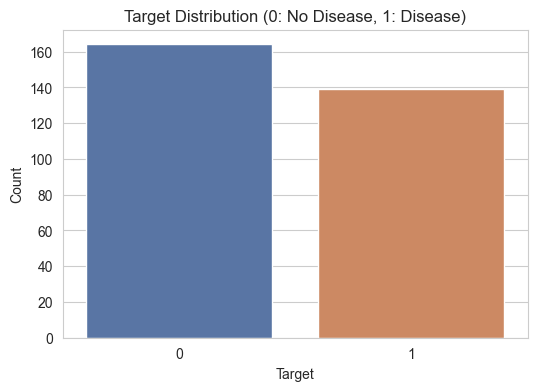

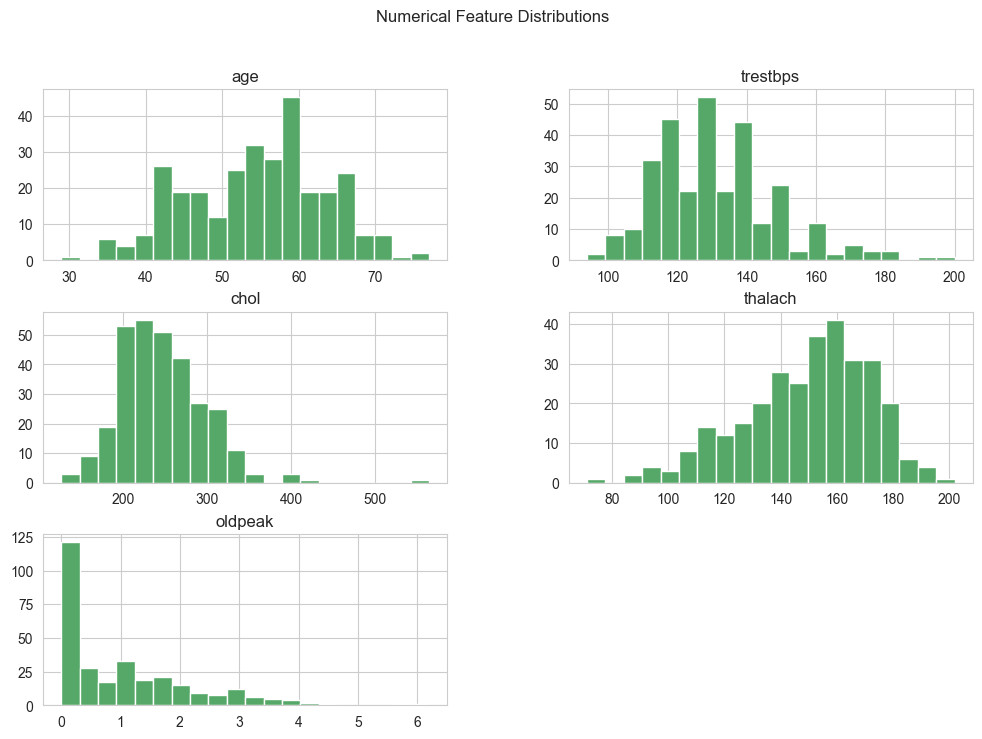

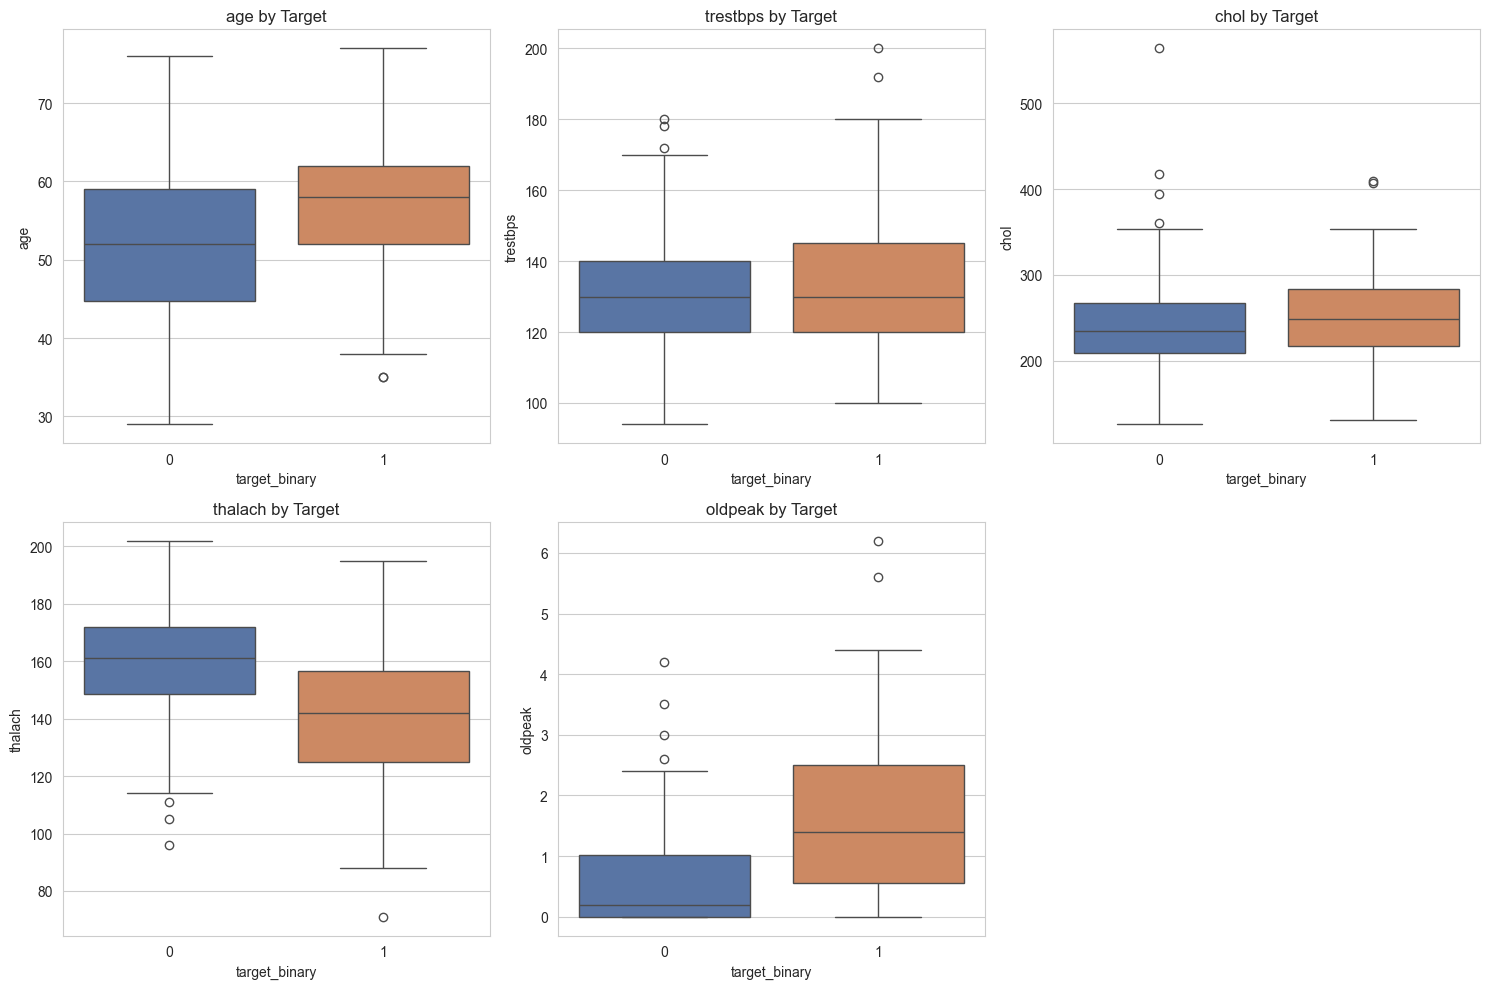

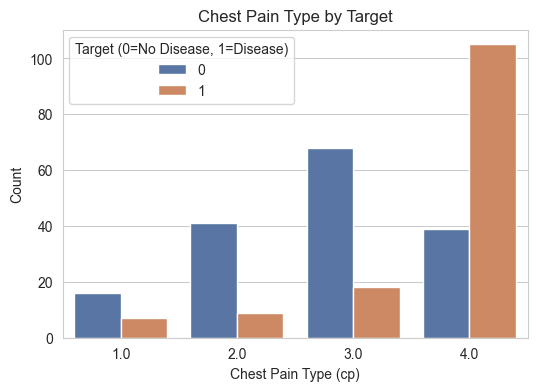

In [255]:
# Binarize target for binary classification
df['target_binary'] = (df['target'] > 0).astype(int)

# -------------------------------
# Target Distribution
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target_binary', hue='target_binary',
              palette=['#4C72B0', '#DD8452'], legend=False)
plt.title('Target Distribution (0: No Disease, 1: Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# -------------------------------
# Histograms for Numerical Features
# -------------------------------
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df[numerical_features].hist(bins=20, figsize=(12,8), color='#55A868')
plt.suptitle('Numerical Feature Distributions')
plt.show()

# -------------------------------
# Boxplots for Numerical Features by Target
# -------------------------------
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.boxplot(data=df, x='target_binary', y=feature,
                hue='target_binary', palette=['#4C72B0', '#DD8452'],
                legend=False, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Target')

# Remove empty subplot (6th slot)
if len(numerical_features) < axes.size:
    for j in range(len(numerical_features), axes.size):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# -------------------------------
# Chest Pain Type by Target
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cp', hue='target_binary',
              palette=['#4C72B0', '#DD8452'])
plt.title('Chest Pain Type by Target')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Target (0=No Disease, 1=Disease)')
plt.show()

Insights:
- Target: 164 no disease (0), 139 disease (1), mild imbalance.
- Numerical features: Age skewed older for disease; higher chol and oldpeak for disease; lower thalach for disease.
- Outliers in chol and oldpeak.
- Categorical like cp: Type 3 more common in disease.

##
2.2 Handle missing values and clean data


In [256]:
# Drop rows with missing values and create an explicit copy to avoid warnings
df_clean = df.dropna().copy()

# Binarize target in clean df
df_clean['target_binary'] = (df_clean['target'] > 0).astype(int)
print("Shape after cleaning:", df_clean.shape)

# Check duplicates
print("Duplicates:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()

Shape after cleaning: (297, 15)
Duplicates: 0


##
2.3 Feature selection and engineering

In [257]:
# Identify categorical and numerical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encode categoricals (use LabelEncoder for simplicity)
le = LabelEncoder()
for col in categorical_features:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Scale numerical
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

##
Reflection 2: 
1. What patterns or anomalies do you see?
   
   Patients with heart disease tend to be older, have higher blood pressure and cholesterol, and lower maximum heart rates. Diseased patients also show higher ST depression (oldpeak). The dataset has mild class imbalance (slightly more “no disease” cases) and a few cholesterol outliers, but no invalid or missing values beyond those addressed.

2. Do any features stand out?
   
   Chest pain type (cp) stands out most type 4 (asymptomatic) is strongly linked to disease. thalach (max heart rate) and oldpeak (ST depression) show clear separation between classes. exang (exercise angina) is another strong indicator, nearly perfectly aligning with disease presence.

3. What preprocessing steps were necessary to clean and improve the data?
   
   Rows with missing values in ca and thal were dropped, categorical fields were label-encoded for model use, and numeric features were standardized. Stratified train/test splitting was applied to preserve class balance.

4. Did you create or modify any features to improve performance?
   
    Yes. The target variable (0–4) was binarized into target_binary (0: no disease, 1: disease) to simplify modeling and improve interpretability for binary classifiers.

## Section 3. Feature Selection and Justification
3.1 Choose features and target 

All 13 input features selected (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal). Target: 'target_binary' (binary categorical).

Justification: These are standard clinical risk factors for heart disease; e.g., age/sex for demographics, cp/oldpeak for symptoms, chol for lipids supported by medical literature.

## 
3.2 Define X and y

In [258]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_clean[feature_cols]
y = df_clean['target_binary']

## 
Reflection
1. Why did you choose these features?

   The features were selected because they have a strong, documented correlation with heart disease risk. They represent important physiological and symptomatic indicators, such as age, blood pressure, cholesterol, chest pain type, and cardiac performance.

2. How might these features impact predictions or accuracy?

   Including these features helps the model capture multiple risk factors, improving prediction accuracy. Key variables like thalach (maximum heart rate) and oldpeak (ST depression) are especially important omitting them could reduce the model’s ability to detect disease patterns effectively.


## Section 4. Train a Model (Classification: Logistic Regression)
4.1 Split the data into training and test sets using train_test_split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##
4.2 Train model using Scikit-Learn model.fit() method.

In [260]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 
4.3 Evaluate performance


=== Linear Regression TEST SET METRICS ===
Accuracy: 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
F1-Score: 0.8148148148148148

Confusion Matrix (Test):
 [[28  4]
 [ 6 22]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


=== Linear Regression TRAIN SET METRICS ===
Accuracy: 0.8481012658227848
Precision: 0.8543689320388349
Recall: 0.8073394495412844
F1-Score: 0.8301886792452831

Confusion Matrix (Train):
 [[113  15]
 [ 21  88]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.85      0.81      0.83       109

    accuracy                

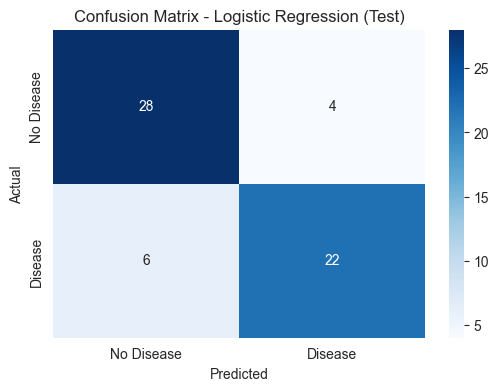

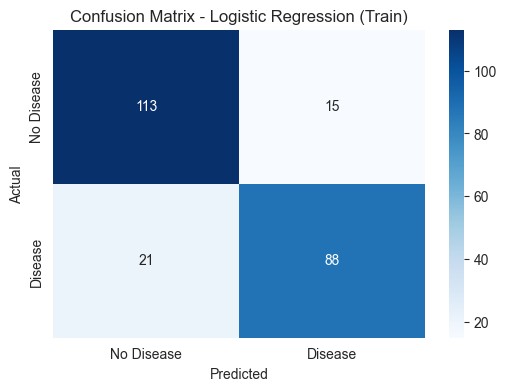

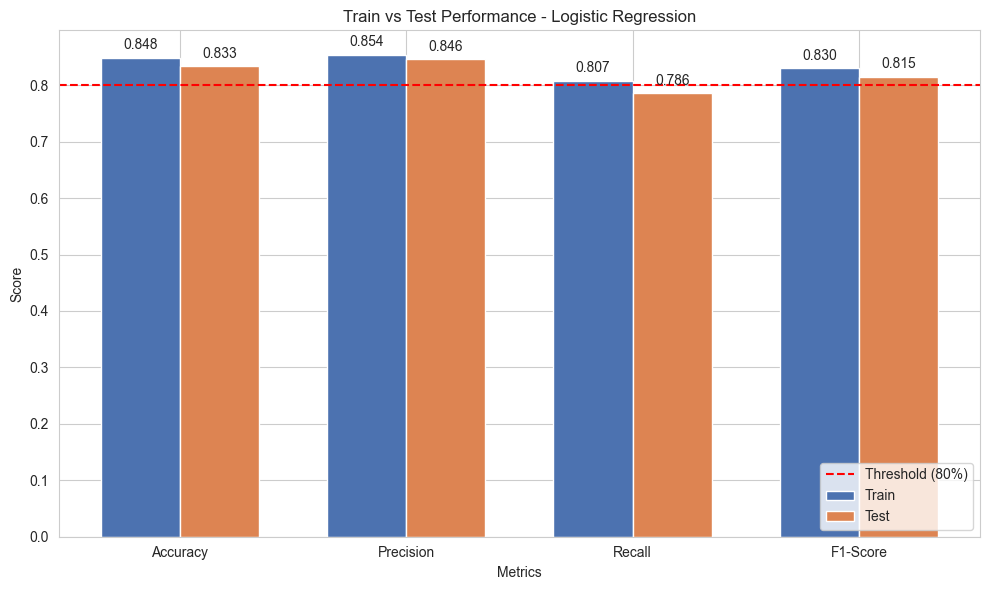

In [261]:
# Test set predictions and metrics
y_pred_lr_test = lr_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_lr_test)
precision_test = precision_score(y_test, y_pred_lr_test)
recall_test = recall_score(y_test, y_pred_lr_test)
f1_test = f1_score(y_test, y_pred_lr_test)
cm_test = confusion_matrix(y_test, y_pred_lr_test)

print("\n=== Linear Regression TEST SET METRICS ===")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)
print("\nConfusion Matrix (Test):\n", cm_test)
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_lr_test))

# Train set predictions and metrics
y_pred_lr_train = lr_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_lr_train)
precision_train = precision_score(y_train, y_pred_lr_train)
recall_train = recall_score(y_train, y_pred_lr_train)
f1_train = f1_score(y_train, y_pred_lr_train)
cm_train = confusion_matrix(y_train, y_pred_lr_train)

print("\n=== Linear Regression TRAIN SET METRICS ===")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-Score:", f1_train)
print("\nConfusion Matrix (Train):\n", cm_train)
print("\nClassification Report (Train):\n", classification_report(y_train, y_pred_lr_train))

# Visualization 1a: Confusion Matrix Heatmap - Test Set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 1b: Confusion Matrix Heatmap - Train Set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 2: Grouped Bar Plot - Train vs Test Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_values = [accuracy_train, precision_train, recall_train, f1_train]
test_values = [accuracy_test, precision_test, recall_test, f1_test]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_values, width, label='Train', color='#4C72B0')
bars2 = ax.bar(x + width/2, test_values, width, label='Test', color='#DD8452')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Train vs Test Performance - Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.axhline(y=0.8, color='r', linestyle='--', label='Threshold (80%)')
ax.legend(loc='lower right')

# Add value labels on bars
for bar, val in zip(bars1, train_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')
for bar, val in zip(bars2, test_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##
Reflection 4: How well did the model perform? Any surprises in the results?

The model performed well, with test accuracy of ~83% and train accuracy of ~85%, showing only a mild train-test gap. Precision (~85%) and recall (~79%) indicate a good balance between detecting disease and avoiding false positives. F1-score (~0.81) confirms solid overall performance. No major surprises appeared, though the slightly lower recall suggests some diseased cases were missed, highlighting the need to monitor false negatives in medical applications..

## Section 5. Improve the Model or Try Alternates (Random Forest)
5.1 Train an alternative classifier

In [262]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##
5.2 Compare performance of all models across the same performance metrics.

=== RANDOM FOREST TEST SET METRICS ===
Accuracy: 0.85
Precision: 0.88
Recall: 0.7857142857142857
F1-Score: 0.8301886792452831

Confusion Matrix (RF Test):
 [[29  3]
 [ 6 22]]

Classification Report (RF Test):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


=== RANDOM FOREST TRAIN SET METRICS ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Confusion Matrix (RF Train):
 [[128   0]
 [  0 109]]

Classification Report (RF Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weigh

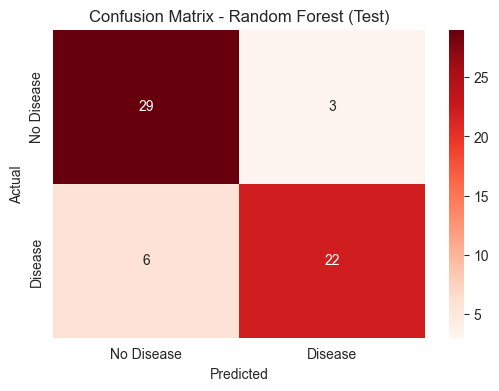

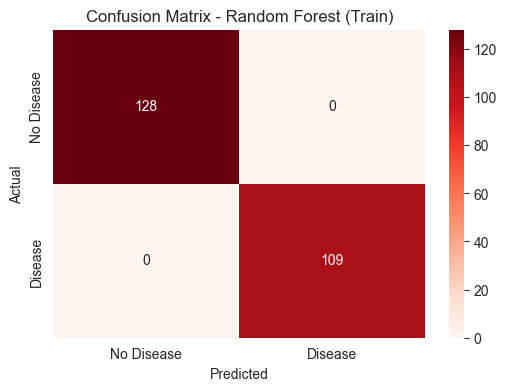

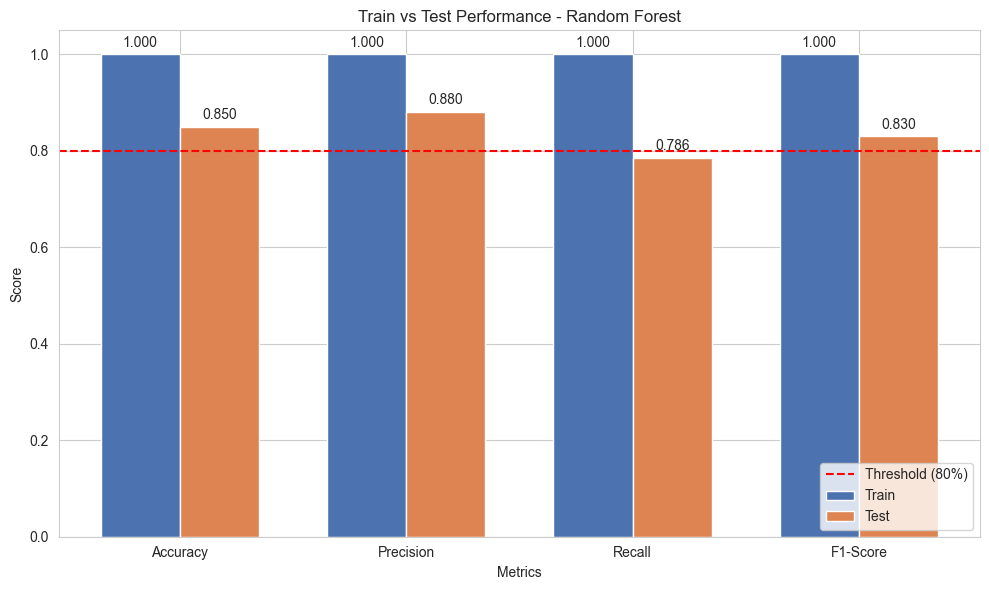

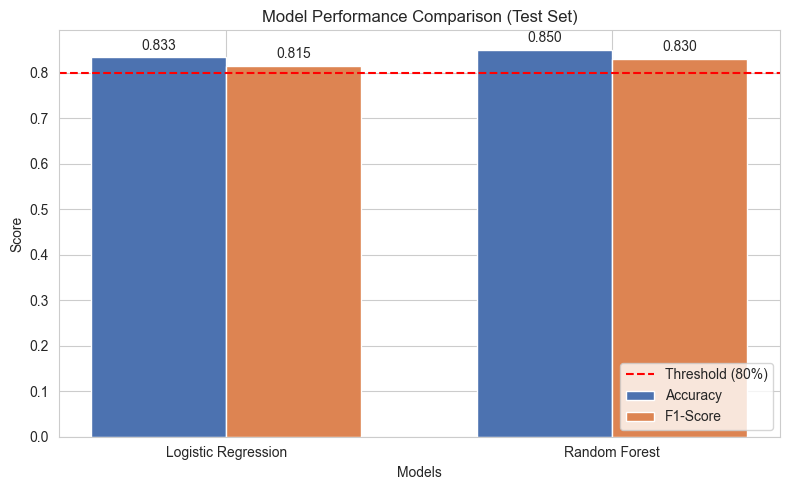

In [263]:
# Test set predictions and metrics for RF (as before)
y_pred_rf_test = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf_test)
rf_precision_test = precision_score(y_test, y_pred_rf_test)
rf_recall_test = recall_score(y_test, y_pred_rf_test)
rf_f1_test = f1_score(y_test, y_pred_rf_test)
rf_cm_test = confusion_matrix(y_test, y_pred_rf_test)

print("=== RANDOM FOREST TEST SET METRICS ===")
print("Accuracy:", rf_accuracy_test)
print("Precision:", rf_precision_test)
print("Recall:", rf_recall_test)
print("F1-Score:", rf_f1_test)
print("\nConfusion Matrix (RF Test):\n", rf_cm_test)
print("\nClassification Report (RF Test):\n", classification_report(y_test, y_pred_rf_test))

# Train set predictions and metrics for RF
y_pred_rf_train = rf_model.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, y_pred_rf_train)
rf_precision_train = precision_score(y_train, y_pred_rf_train)
rf_recall_train = recall_score(y_train, y_pred_rf_train)
rf_f1_train = f1_score(y_train, y_pred_rf_train)
rf_cm_train = confusion_matrix(y_train, y_pred_rf_train)

print("\n=== RANDOM FOREST TRAIN SET METRICS ===")
print("Accuracy:", rf_accuracy_train)
print("Precision:", rf_precision_train)
print("Recall:", rf_recall_train)
print("F1-Score:", rf_f1_train)
print("\nConfusion Matrix (RF Train):\n", rf_cm_train)
print("\nClassification Report (RF Train):\n", classification_report(y_train, y_pred_rf_train))

# Model comparison table (Test Set Only)
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), rf_accuracy_test],
    'F1-Score': [f1_score(y_test, y_pred_lr), rf_f1_test]
})
print("\nModel Comparison (Test Set):\n", comparison)

# Visualization 1a: Confusion Matrix Heatmap - RF Test Set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm_test, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest (Test)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 1b: Confusion Matrix Heatmap - RF Train Set
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm_train, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 2: Grouped Bar Plot - RF Train vs Test Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_train_values = [rf_accuracy_train, rf_precision_train, rf_recall_train, rf_f1_train]
rf_test_values = [rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_train_values, width, label='Train', color='#4C72B0')
bars2 = ax.bar(x + width/2, rf_test_values, width, label='Test', color='#DD8452')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Train vs Test Performance - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.axhline(y=0.8, color='r', linestyle='--', label='Threshold (80%)')
ax.legend(loc='lower right')

# Add value labels on bars
for bar, val in zip(bars1, rf_train_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')
for bar, val in zip(bars2, rf_test_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualization 3: Grouped Bar Plot for Model Comparison (Test Set)
models = comparison['Model']
accuracy_vals = comparison['Accuracy']
f1_vals = comparison['F1-Score']

x_model = np.arange(len(models))
width_model = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars_acc = ax.bar(x_model - width_model/2, accuracy_vals, width_model, label='Accuracy', color='#4C72B0')
bars_f1 = ax.bar(x_model + width_model/2, f1_vals, width_model, label='F1-Score', color='#DD8452')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Test Set)')
ax.set_xticks(x_model)
ax.set_xticklabels(models)
ax.axhline(y=0.8, color='r', linestyle='--', label='Threshold (80%)')
ax.legend(loc='lower right')

# Add value labels on bars
for bar, val in zip(bars_acc, accuracy_vals):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')
for bar, val in zip(bars_f1, f1_vals):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##
Reflection 5: 

- Which model performed better? 
  
    On the test set, both models performed well. Random Forest slightly outperformed Logistic Regression in accuracy (85% vs. 83%) and F1-score (0.83 vs. 0.81). However, despite these metrics, Random Forest may still risk overfitting, so model interpretability and generalization should be considered alongside raw scores.

- Why might one classifier be more effective in this specific case?
    
     Logistic Regression may be more effective for this dataset because the clinical features are roughly linearly separable, making LR simpler, more interpretable, and less prone to overfitting on a small dataset.

## Section 6. Final Thoughts & Insights
6.1 Summarize findings.

| Model               | Dataset | Accuracy | Precision | Recall | F1-Score |
|--------------------|---------|---------|-----------|--------|----------|
| Logistic Regression | Train   | 0.848   | 0.854     | 0.807  | 0.830    |
| Logistic Regression | Test    | 0.833   | 0.846     | 0.786  | 0.815    |
| Random Forest       | Train   | 1.000   | 1.000     | 1.000  | 1.000    |
| Random Forest       | Test    | 0.850   | 0.880     | 0.786  | 0.830    |


##
6.2 Challenges Faced

The analysis faced several challenges, including missing values in the ca and thal columns, which were removed to avoid imputation bias. The small dataset (303 samples) limited model complexity and increased the risk of overfitting. Mild class imbalance required a stratified train-test split to preserve class proportions. Additionally, it was important to balance model interpretability with predictive performance to ensure clinical relevance.

## 
6.3 Next Steps if More Time

With more time, the analysis could be extended by applying oversampling techniques like SMOTE to address class imbalance, testing additional classifiers such as XGBoost or SVM, and performing feature importance or SHAP analysis to interpret model predictions. Cross-validation and hyperparameter tuning could further improve model robustness and performance.

##
Reflection 6: What did you learn from this project?

This project highlighted the importance of data preprocessing, feature selection, and model evaluation in medical datasets. Key clinical features like age, chest pain type, and heart rate strongly influenced predictions. It also demonstrated how model choice impacts the trade-off between interpretability and performance, while emphasizing the ethical considerations involved in healthcare machine learning.